# Project: Wrangling and Analyze Data

## Table of content
<ul>
<li><a href="#INTR">1.0 Introduction</a></li>
<li><a href="#DTG">2.0 Data Gathering</a></li>
<li><a href="#DA">3.0 Assessing Data</a></li>
<li><a href="#SQI">4.0 Summary of Data quality and tidy issues
<li><a href="#TI">5.0 Tidy Issues</a></li>
<li><a href="#DC">6.0 Data Copying</a></li>
<li><a href="#CD">7.0 Cleaning Data</a></li>
<li><a href="#STD">8.0 Storing Data</a></li>
<li><a href="#AV">9.0 Insights and Visualization</a></li>
</ul>

<a id='INTR'></a>
# 1.0 Introduction

The tweet history of Twitter user @dog rates, otherwise known as WeRateDogs, is a dataset that will only be very useful for various purposes only when properly wrangled. Applying the knowledge from python and its libraries, we can make the cleaning of these data.

In the sections below, first, all the three pieces of data for this project are gathered and loaded into Jupyter notebook using appropriate methods required to gather each data. Secondly, data assessment is a critical aspect of data wrangling process. By this assessment, whether by visual or done programmatically, are critical for identifying data quality and tidy issues for documentation.

In the cleaning section, all the issues documented while assessing were cleaned after a copy of the original data was made. Cleaning includes merging individual pieces of data according to the rules of tidy data. Then the result, which a better-quality and tidy master_data pandas DataFrame (or DataFrame) were stored.

Furthermore, the analysis and visuals of the wrangled data was made to give detailed insight that can be applied by companies that provides goods and services for the promotion of their products such as dog food and accessories sales, and healthcare services. When such opportunities are maximized and products well marketed on Twitter at such time, there is a probability of increased sales and possibly income.

**Questions for the insights**
1. In the WeRateDog data collected, the tweets for how many years were recorded in the data collected? Which year has the highest tweet?

2. Which month(s) has the highest tweet of year? 

3. Considering the three years data, which month had the highest tweet value counts?



<a id='DTG'></a>
## 2.0 Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import all packages
import pandas as pd
import json
import configparser as configparser
from urllib.request import urlretrieve
import requests
import io
import requests
import numpy as np
import tweepy as tw
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install request


The following command must be run outside of the IPython shell:

    $ pip install request

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
# to read thr twitter archived enhanced file
# let TAE be the dataframe for twitter-archive-enhanced
TAE = pd.read_csv('twitter-archive-enhanced.csv')
TAE


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# let the dataframe for image predictions be represented with IP
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r =requests.get(url)
print(r)
IP= pd.read_csv(url, sep = '\t')

<Response [200]>


In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r =requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
     file.write(r.content)
IP = pd.read_csv('image-predictions.tsv', sep = '\t')
IP.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



In [7]:
# First, query Twitter API for each tweet that is in the Twitter archive
# secondly, save JSON in a text file

# The Twitter's API secret credentials:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


In [8]:
# To authenticate the secret credentials
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [9]:
# First the df_1 is equal to the Twitter _archive_enhanced data. 
df_1 = TAE
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Here, we query Twitter's API for JSON data for each tweet Id in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# To save each tweet's, we need to return JSON as a new line in a .txt file, 
# so we use the code below:
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
    end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

In [11]:
# Open an empty list for the tweets
tweets_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        tweets_list.append(data)


In [12]:
# call RF_tweet
RF_tweet = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])
RF_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='DA'></a>
## 3.0 Assessing Data


### 3.1 Data assessment on Twitter archive enhanced 

In [13]:
#call the dataframe TAE
TAE

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
# To view the columns names
TAE.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
# To get information on the datatype of the columns in TAE
TAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# To get the statical detals of the dataframe TAE
TAE.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# T count the numbaer of distinct element
TAE.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
# To return a series containing counts of unique values
TAE.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There are 4 sources of the tweets but majority of the tweets were from iphones

In [19]:
#To view/confirm that some missing values in the table TAE
TAE.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,None,None,pupper,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
427,821153421864615936,8.211526e+17,113211856.0,2017-01-17 00:33:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@imgur for a polar bear tho I'd say 13/10 is a...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None


In [20]:
#Using slicing method to view further missing values
TAE.loc[29:2326, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. His doggles are pupside down....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None


There are several missing values (completeness issues) in various columns in TAE dataframe.

In [21]:
#To query tweet_id that has a different text that has no meaning
TAE.query('tweet_id == "761672994376806400"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None


The Text in the index number 870 made no grammar sense

In [22]:
#To find missing values among the tweet_id
TAE.tweet_id.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [23]:
# To find empty cells
TAE.tweet_id.isnull().sum()

0

In [24]:
# To check for duplicates
TAE.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

There is no missing tweet_id

In [25]:
# To know the aggregate number of duplicates
TAE.tweet_id.duplicated().sum()

0

There is no tweet_id duplicate

In [26]:
TAE.tweet_id.sort_values()

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
2350    666050758794694657
2349    666051853826850816
2348    666055525042405380
2347    666057090499244032
2346    666058600524156928
2345    666063827256086533
2344    666071193221509120
2343    666073100786774016
2342    666082916733198337
2341    666094000022159362
2340    666099513787052032
2339    666102155909144576
2338    666104133288665088
2337    666268910803644416
2336    666273097616637952
2335    666287406224695296
2334    666293911632134144
2333    666337882303524864
2332    666345417576210432
2331    666353288456101888
2330    666362758909284353
2329    666373753744588802
2328    666396247373291520
2327    666407126856765440
2326    666411507551481857
               ...        
29      886366144734445568
28      886680336477933568
27      886736880519319552
26      886983233522544640
25      887101392804085760
24      887343217045368832
2

In [27]:
TAE.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Buddy               7
Toby                7
Daisy               7
Bailey              7
Jax                 6
Jack                6
Leo                 6
Oscar               6
Dave                6
Stanley             6
Milo                6
Bella               6
Scout               6
Koda                6
Rusty               6
Sammy               5
                 ... 
Brian               1
Andy                1
Deacon              1
Christoper          1
Beemo               1
Alexander           1
Theo                1
Zuzu                1
Linus               1
Gordon              1
Strudel             1
Jockson             1
Peanut              1
Cannon              1
Clybe     

In [28]:
TAE.loc[TAE.name =='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [29]:
# Find the rows with the dog name 
TAE.loc[TAE.name =='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [30]:
#Slicing the text column
TAE.loc[:, 'text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [31]:
TAE. doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [32]:
TAE.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [33]:
TAE. pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [34]:
TAE. puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64


### 3.1.1 Findings from Twitter archive enhanced data (TAE)
A) Data Quality issues
1. Visual assessment
    a)The following columns have completeness issues (i.e, there are lots of missing data):
        in_reply_to_status_id
        in_reply_to_user_id
        retweeted_status_id
        retweeted_status_user_id
        retweeted_status_timestamp
        expanded_urls
        
    b) the words 'NaN' and 'None' (in the dog type columns) represent the same thing
    c) on the timestamp column, the +0000 appeared in every single cell and does not represent anything (that is, it does not have any meaning).
    d) The column 'source' has identical 'href' 
    e) https://twitter.com/dog_rates/status is repeated in the column 'expanded_url'
    f) row 694 had an exponential number as retweeted_status_id and retweeted_status_user_id
    g) some dogs are withot names, while others have funny names like 'a', 'an' and 'the'.
    

2. Programmatic assessment
    1. The name column has names of dog to be 'none', 'a', 'an', and 'the' which occurred 745, 55, 7 and 8 times, respectively.
    2. The text column has urls and hashtag
    3. The text column has inconstitency issues (a mixture of capital and small letters e.g. row 42
    4. In the text coumn with index number 870 and tweet_id '761672994376806400' made no sense.
 
B) Tidy data issues
   a) retweeted_status_timestamp has the date and time in one column
   
   b) The column 'text' have both text and ratings in fraction such as 10/11, and website or url
   
   c) the timestamp has date, time and '+0000' in a single column
   
   d) the column expanded_url has both text and figures

### 3.2 Data Assessment on image prediction (IP)

In [35]:
# To view the the image precion dataframe again
IP.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
#To take a random sample of the dataframe
IP.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True
1838,837471256429613056,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1,Norwegian_elkhound,0.976255,True,keeshond,0.013990,True,seat_belt,0.002111,False
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True


In [37]:
# To gain furthe inight on the information such as datatype of the individual colums
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
IP.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [39]:
# Create a function for none-dogs
# To identify and count the IP that were none-dogs
def none_dogs(column_label):
    return IP[IP[column_label]== False].count()

In [40]:
IP['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
IP['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
IP['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
IP.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
IP[IP['p1'].duplicated()].head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True


In [45]:
# To query a particular tweet_id for false dog image
IP.query('tweet_id == "891689557279858688"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [46]:
# To view the columns so as to drop unnecessary columns
IP.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [47]:
IP_false_count = IP['p1_dog'].value_counts(False)
IP_false_count

True     1532
False     543
Name: p1_dog, dtype: int64

In [48]:
IP_false_count = IP['p2_dog'].value_counts(False)
IP_false_count

True     1553
False     522
Name: p2_dog, dtype: int64

In [49]:
IP_false_count = IP['p3_dog'].value_counts(False)
IP_false_count

True     1499
False     576
Name: p3_dog, dtype: int64

### 3.2.1 Findings from image prediction (IP)
A) Data Quality issues

1. Visual assessment

    a) There are alot of false images. For example, the columns p1, p2, and p3  have animals and and other items that are 
       not dog such as hen, box_turtle, paper_towel, convertible etc
        column p1: web_site, paper towel,
        column p2: teddy, shower_cap and Chrismas_stocking
        column p3: seat_bealt, ski_bear and muzzle 

2. Programmatic assessment
    i) About 1697 rows are duplicates
    ii) There are about 281 missing tweet_id because TAE has 2356 while IP 
        has 2075

    
B) Tidy data issues
   i). None was identified


### 3.3 Data assessment on Twitter API data (RF_tweet)

In [50]:
RF_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [51]:
# For row and column length
RF_tweet.shape

(2354, 3)

In [52]:
RF_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [53]:
RF_tweet.id.duplicated().sum()

0

In [54]:
RF_tweet.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [55]:
RF_tweet.sample(5)

,id,retweet_count,favorite_count
2352,666029285002620928,48,132
2186,668975677807423489,641,1386
426,821153421864615936,10,280
1264,709852847387627521,1336,3824
1545,689280876073582592,819,2197


In [56]:
RF_tweet.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [57]:
RF_tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### 3.3.1 Data quality issues on Twitter API data (RF_tweet)
A) Data Quality issues

1. Visual assessment
   a)the column label for the tweet_id is represented with id which is not consistent with the other TAE and IP dataframes.
    
    
2. Programmatic assessment

    a) there are 2 missing rows because when compared to the TAE dataframe with 2356 rows, RF_tweet has 2354 rows.
    
    
B) Tidy data issues
1. No untidy issues observed

<a id='SQI'></a>
### 4.0 Summary of  8 Quality issues to wrangle
1. TAE: Remove retweets (RT@) within text in text column

2. TAE: The datatype of the column named 'tweet_id' is in integers

3. TAE: data type of the column labelled 'timestamp' is in object with redundant +0000

4. TAE: unnecessary columns such as'in_ reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'.

5. TAE: No retweet column is required

6. TAE: column with label 'name' has 'None'. Both None and NaN mean the same thing (inconstitency)


7. IP: the datatype on the column with the label 'tweet_id' is integer

8. RF_tweet: datatype of the 'id' column in integer

9. RF_tweet: inconstitent 'id' column label 

<a id='TI'></a>
### 5.0 Tidy issues
1. The timestamp in the twitter archive enhanced dataframe has date and time (plus +0000). 

2. The doggo, puppo, pupper and floffer columns of TAE dataframe. 


<a id='DC'></a>
## 6.0 Data Copying

In [58]:
# Make copies of original pieces of data
TAE_clean = TAE.copy()
IP_clean = IP.copy()
RF_tweet_clean = RF_tweet.copy()


<a id='CD'></a>
## 7.0 Cleaning Data

## 7.1 Quality Issues

### 7.1.1 Issue #1:

Define

Remove retweets (RT@) within text in text column

Code

In [59]:
TAE_clean = TAE_clean[TAE_clean.retweeted_status_id.isnull()]
TAE_clean = TAE_clean[TAE_clean.retweeted_status_user_id.isnull()]
TAE_clean = TAE_clean[TAE_clean.retweeted_status_timestamp.isnull()]

Test

In [60]:
TAE_clean.text.sample(5)

1101    This is Dakota. He hasn't grow into his skin y...
290                                    @markhoppus 182/10
714     This is Balto. He's very content. Legendary to...
267     This is Penny. She's a dragon slayer. Feared b...
1252    This is Staniel. His selfie game is strong af....
Name: text, dtype: object

### 7.1.2 Issue #2:

Define

Convert the datatype of TAE dataframe with column name 'tweet_id' from integers to string (object)

Code

In [61]:
TAE_clean['tweet_id']= TAE_clean['tweet_id'].astype(str)

Test

In [62]:
type(TAE_clean['tweet_id'][0])

str

### 7.1.3 Issue #3:

Define:


Change the data type of the column labelled 'timestamp' from object into datetime
This should also remove the redundant +0000 in the same column.

Code

In [63]:
TAE_clean['timestamp'] = pd.to_datetime(TAE['timestamp'])


Test

In [64]:
TAE_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

In [65]:
TAE_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 7.1.4 Issue #4:

Define

Drop unnecessary columns, that is, columns that are not needed ('in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls').

Code

In [66]:
TAE_clean =TAE_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'])

Test

In [67]:
TAE_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 7.1.5 Issue #5:

Define

Since the retweets are not required, the columns with retweet must be dropped

Code

In [68]:
TAE_clean =TAE_clean.drop(columns=['retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp'])

Test

In [69]:
TAE_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 283.9+ KB


In [70]:
TAE_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 7.1.6 Issue #6:

Define

Change the 'None' in the column 'name' into NaN

Code

In [71]:
TAE_clean['name']=TAE_clean['name'].replace('None', value = np.nan)

Test

In [72]:
TAE_clean.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
30           NaN
          ...   
2326       quite
2327           a
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333          an
2334           a
2335          an
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351

### 7.1.7 Issue #7:

Define

Change the datatype of IP dataframe on the column with the label 'tweet_id'

Code

In [73]:
IP_clean['tweet_id']= IP_clean['tweet_id'].astype(str)

Test

In [74]:
IP_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 7.1.8 Issue #8:

Define

Change the datatype of the 'id' column of RF_tweet dataframe

Code

In [75]:
RF_tweet_clean['id']= RF_tweet_clean['id'].astype(str)

Test

In [76]:
RF_tweet_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 7.1.9 Issue #9:

Define

Rename the 'id' column in the RF_tweet dataframe

Code

In [77]:
RF_tweet_clean.rename(columns ={'id' :'tweet_id'}, inplace=True)

Test

In [78]:
RF_tweet_clean.sample(5)

,tweet_id,retweet_count,favorite_count
508,812466873996607488,2231,8900
1684,681610798867845120,533,2100
1111,733109485275860992,17621,44619
806,771908950375665664,2181,7298
1605,685663452032069632,1656,3557


### 7.2 Tidy Issues

### 7.2.1 Untidy Issue #1 :

Define

Tidy issues: Separate the date and time in column timestamp into day, month, year and hour to have individual columns

Code

In [79]:
TAE_clean['timestamp'].dt.year
TAE_clean['timestamp'].dt.month
TAE_clean['timestamp'].dt.day
TAE_clean['timestamp'].dt.hour
TAE_clean['timestamp'].dt.minute

0       23
1       17
2       18
3       58
4        0
5        8
6       27
7       22
8       25
9       59
10      31
11      11
12      55
13      10
14       2
15      19
16      22
17      56
18      23
20      49
21       6
22      39
23      47
24       8
25       7
26      17
27      58
28      14
29      25
30      51
        ..
2326    24
2327     6
2328    23
2329    54
2330    10
2331    32
2332     1
2333    31
2334    37
2335    11
2336    14
2337    57
2338     2
2339    55
2340    44
2341    22
2342    38
2343    59
2344    52
2345    22
2346     1
2347    55
2348    49
2349    35
2350    30
2351    24
2352     4
2353    21
2354     5
2355    32
Name: timestamp, Length: 2175, dtype: int64

In [80]:
TAE_clean['year']= TAE_clean['timestamp'].dt.year
TAE_clean['month']= TAE_clean['timestamp'].dt.month
TAE_clean['day']= TAE_clean['timestamp'].dt.day
TAE_clean['hour']= TAE_clean['timestamp'].dt.hour
TAE_clean['minute']= TAE_clean['timestamp'].dt.minute

Test

In [81]:
TAE_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,hour,minute
1943,673709992831262724,2015-12-07 03:45:53,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,12,10,NaN,None,None,None,None,2015,12,7,3,45
162,860524505164394496,2017-05-05 16:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,13,10,Carl,None,None,None,None,2017,5,5,16,0
1983,672964561327235073,2015-12-05 02:23:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. He's a Toasty Western Sriracha....,10,10,Terry,None,None,None,None,2015,12,5,2,23
1641,684122891630342144,2016-01-04 21:23:02,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,11,10,NaN,None,None,None,None,2016,1,4,21,23
950,752173152931807232,2016-07-10 16:10:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,12,10,Brody,None,None,None,None,2016,7,10,16,10


In [82]:
TAE_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

### 7.2.2 Untidy issue #2 :

Define

Merge the columns with the title: doggo,floofer,pupper, and puppo into in a column called category 

Code

In [83]:
dog_stage = ["doggo","floofer","pupper","puppo"]
TAE_clean[dog_stage] = TAE_clean[dog_stage].replace({'None':np.nan})

In [84]:
dog_stage

['doggo', 'floofer', 'pupper', 'puppo']

In [85]:
TAE_clean[dog_stage]

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,doggo,NaN,NaN,NaN


In [86]:
# create a new column dog stage that combines all relevant columns
TAE_clean['dog_stage'] = TAE_clean[TAE_clean.columns[7:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [87]:
TAE_clean.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [88]:
TAE_clean.drop(TAE_clean[TAE_clean['dog_stage'] == ''].index, inplace = True)

TAE_clean.drop(TAE_clean[TAE_clean['dog_stage'] == 'doggo,puppo'].index, inplace = True)
TAE_clean.drop(TAE_clean[TAE_clean['dog_stage'] == 'doggo,floofer'].index, inplace = True)
TAE_clean.drop(TAE_clean[TAE_clean['dog_stage'] == 'doggo,pupper'].index, inplace = True)

In [89]:
TAE_clean.dog_stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: dog_stage, dtype: int64

In [90]:
master_data = [] 
master_data = pd.merge(TAE_clean,IP_clean, on='tweet_id', how='left')

In [91]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 28 columns):
tweet_id              332 non-null object
timestamp             332 non-null datetime64[ns]
source                332 non-null object
text                  332 non-null object
rating_numerator      332 non-null int64
rating_denominator    332 non-null int64
name                  193 non-null object
doggo                 75 non-null object
floofer               9 non-null object
pupper                224 non-null object
puppo                 24 non-null object
year                  332 non-null int64
month                 332 non-null int64
day                   332 non-null int64
hour                  332 non-null int64
minute                332 non-null int64
dog_stage             332 non-null object
jpg_url               295 non-null object
img_num               295 non-null float64
p1                    295 non-null object
p1_conf               295 non-null float64
p1_dog        

In [92]:
master_data = master_data.drop(columns=['timestamp', 'jpg_url','doggo', 'floofer', 'pupper', 'puppo', 'p1_conf','p2_conf', 'p3_conf'])

In [93]:
master_data.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,hour,minute,dog_stage,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,26,15,59,doggo,1.0,Pembroke,True,Cardigan,True,Chihuahua,True
1,889665388333682689,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,2017,7,25,1,55,puppo,1.0,Pembroke,True,Cardigan,True,basenji,True


In [94]:
master_data = pd.merge(master_data, RF_tweet_clean, on='tweet_id', how='inner')

In [95]:
master_data.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,hour,...,dog_stage,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,26,15,...,doggo,1.0,Pembroke,True,Cardigan,True,Chihuahua,True,7711,32467
1,889665388333682689,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,2017,7,25,1,...,puppo,1.0,Pembroke,True,Cardigan,True,basenji,True,8538,38818


In [96]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 21 columns):
tweet_id              332 non-null object
source                332 non-null object
text                  332 non-null object
rating_numerator      332 non-null int64
rating_denominator    332 non-null int64
name                  193 non-null object
year                  332 non-null int64
month                 332 non-null int64
day                   332 non-null int64
hour                  332 non-null int64
minute                332 non-null int64
dog_stage             332 non-null object
img_num               295 non-null float64
p1                    295 non-null object
p1_dog                295 non-null object
p2                    295 non-null object
p2_dog                295 non-null object
p3                    295 non-null object
p3_dog                295 non-null object
retweet_count         332 non-null int64
favorite_count        332 non-null int64
dtypes: float64(1), i

<a id='STD'></a>
## 8.0 Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [97]:
#To save the data as twitter_archive_master.csv
master_data.to_csv("twitter_archive_master.csv", index= False)

In [98]:
# To read the newly save data
df=pd.read_csv('twitter_archive_master.csv')

In [99]:
# Call the newly saved data as df
df

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,hour,...,dog_stage,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,26,15,...,doggo,1.0,Pembroke,True,Cardigan,True,Chihuahua,True,7711,32467
1,889665388333682689,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,2017,7,25,1,...,puppo,1.0,Pembroke,True,Cardigan,True,basenji,True,8538,38818
2,889531135344209921,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13,10,Stuart,2017,7,24,17,...,puppo,1.0,golden_retriever,True,Labrador_retriever,True,redbone,True,2321,15359
3,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,2017,7,15,23,...,pupper,1.0,French_bulldog,True,Chihuahua,True,Boston_bull,True,3316,21524
4,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,2017,7,9,21,...,doggo,1.0,German_shepherd,True,malinois,True,Norwegian_elkhound,True,3128,20771
5,883360690899218434,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,2017,7,7,16,...,floofer,1.0,chow,True,Tibetan_mastiff,True,Newfoundland,True,3825,22986
6,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,2017,7,6,0,...,pupper,1.0,Labrador_retriever,True,Chesapeake_Bay_retriever,True,flat-coated_retriever,True,5134,28903
7,881536004380872706,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,2017,7,2,15,...,pupper,1.0,Samoyed,True,Angora,False,Persian_cat,False,16570,50199
8,878776093423087618,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,13,10,Snoopy,2017,6,25,0,...,puppo,2.0,Italian_greyhound,True,whippet,True,Ibizan_hound,True,4319,19763
9,876838120628539392,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,12,10,Ginger,2017,6,19,16,...,pupper,1.0,bloodhound,True,redbone,True,Tibetan_mastiff,True,3506,21125


<a id='AV'></a>
## 9.0 Insights and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [100]:
df.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,hour,...,dog_stage,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count
0,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,26,15,...,doggo,1.0,Pembroke,True,Cardigan,True,Chihuahua,True,7711,32467
1,889665388333682689,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,2017,7,25,1,...,puppo,1.0,Pembroke,True,Cardigan,True,basenji,True,8538,38818


### 9.1 Insights:
1. In the WeRateDog data collected, the tweets for how many years were recorded in the data collected? Which year has the highest tweet?

2. Which month(s) has the highest tweet of year? 

3. Considering the three years data, which month had the highest tweet value counts?


### 9.2 Visualization

Text(0.5,1,'Value count for the individual year')

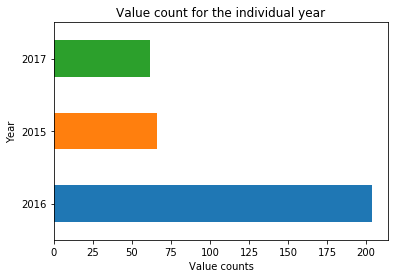

In [101]:
# To plot the value counts of the individual year
df['year'].value_counts().plot(kind='barh')
plt.xlabel('Value counts')
plt.ylabel('Year')
plt. title( 'Value count for the individual year')


The dataset has record for about three years but the year 2016 has the highest number of tweets across the three years.

In [102]:
df.year.value_counts()

2016    204
2015     66
2017     62
Name: year, dtype: int64

In [103]:
# First group group the year and then cal the value count for year 2015
year_2015 = df.groupby('year')
year_2015.month.value_counts()

year  month
2015  12       66
2016  1        46
      7        25
      2        24
      6        19
      9        15
      5        14
      3        13
      4        12
      11       12
      10        9
      12        8
      8         7
2017  1        16
      2        16
      6         9
      7         8
      3         6
      5         5
      4         2
Name: month, dtype: int64

Text(0.5,1,'Value count for the year 2016')

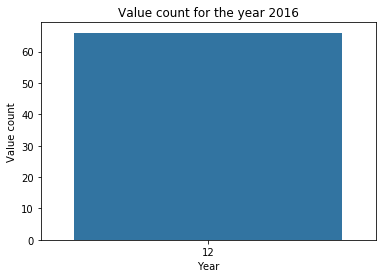

In [104]:
# Query for the year 2015
month_2015 = df.query('year == 2015')
sb.countplot(data= month_2015, x = 'month')
plt.xlabel('Year')
plt.ylabel('Value count')
plt. title( 'Value count for the year 2016')

It was observed that the value count for the year 2015 is 66. However, this record was for only for the twelfth (12th) month. 

In [105]:
# Query for the year 2016
month_2016 = df.query('year == 2016')
month_2016.month.value_counts()

1     46
7     25
2     24
6     19
9     15
5     14
3     13
11    12
4     12
10     9
12     8
8      7
Name: month, dtype: int64

Text(0.5,1,'Value count for the month in the year 2016')

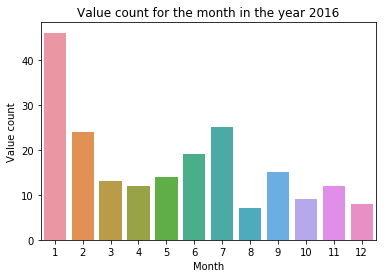

In [106]:
# To plot the monthly value counts for the year 2016

sb.countplot(data= month_2016, x = 'month')
plt.xlabel('Month')
plt.ylabel('Value count')
plt. title( 'Value count for the month in the year 2016')

The observation here is that the first month has the highest record of tweets. This can be attributed to the season of love that is an extension from the Christmas season and holiday coupled with the cold weather in some countries. During this time, family, and friend (and by extension pets such as dogs) are shown some care and love. Secondly, during this holiday season, friends and family spend quality time with each other, and that includes their dogs. Hence, at this time lots of tweets about dogs are recorded on Twitter page. It is important that companies involved in dog foods, accessories, products, and healthcare can maximize such opportunities to do a huge promo on their products because many dog owners have the time and pay more attention to them. As the love and care during this season may be extended to their pets and can be demonstrated by treating their dogs with new product or in a special way.

Text(0.5,1,'Value count for the month in the year 2017')

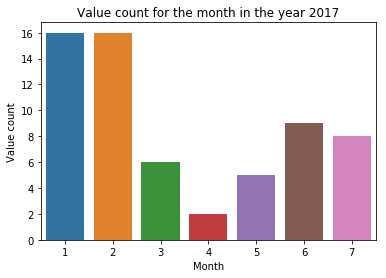

In [108]:
# First query for the year 2017, and  
# Then plot the monthly value counts for the year 2016
month_2017 = df.query('year == 2017')
sb.countplot(data= month_2017, x = 'month')
plt.xlabel('Month')
plt.ylabel('Value count')
plt. title( 'Value count for the month in the year 2017')


Although the data for the year 2017 is incomplete, the month of January also showed the highest number of tweets. This be used to buttress my insight as stated for the year 2016.